In [21]:
from proveit.basiclogic import In, Equals, autoSubstitute
from proveit.physics.quantum.QPE.axioms import failDef, alphaDef, mDef, tInNaturalsPos, modAddDef, PsiKetInQRegSpace
from proveit.physics.quantum.QPE.theorems import fail_sum, success_sum, bestInInts, \
    two_pow_t_in_posnats, two_pow_tMinusOne_in_posnats, successProbInReals
from proveit.physics.quantum.QPE.common import t_, m_, Psi_, two_pow_t, two_pow_t_minus_one, b_, fullDomain
from proveit.physics.quantum.QPE.phaseEstOps import ModAdd
from proveit.physics.quantum.theorems import registerQubitBornRule, registerQubitAllProbs
from proveit.common import a, b, c, k, l, n, x, y, fx, gy, eps, m, N, Psi, R, S
from proveit.number import Add, Neg, Subtract, Exponentiate, DiscreteContiguousSet
from proveit.number.common import zero, one, two
from proveit.number.natural.axioms import zeroAddOne
from proveit.number.numberSets import deduceInIntegers, deduceInReals, deduceInComplexes, NaturalsPos, Reals, \
    deduceNegative, deducePositive
from proveit.number.integer.theorems import inNaturalsPosIfPos, fullModularRangeEquivLeftShift
from proveit.number.complex.theorems import equivSums, addTwice, outerCancel, subTwoAddOne
from proveit.statistics import Prob
from IPython.display import display

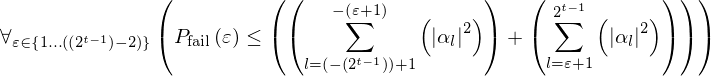

In [2]:
fail_sum.beginProof()

In [3]:
epsInDomain = In(eps, fail_sum.domain)
epsInDomain

In [4]:
oneMoreThanZero = zeroAddOne.rhsSubstitute(Add(zero, one).deduceStrictIncrease(0)).proven()
oneMoreThanZero

In [5]:
epsInDomain.domain.deduceMemberInIntegers(eps).proven({epsInDomain})
epsInDomain.domain.deduceMemberLowerBound(eps).applyTransitivity(oneMoreThanZero).deriveReversed().proven({epsInDomain})
inNaturalsPosIfPos.specialize({a:eps}).proven({epsInDomain})

In [6]:
failDef

In [7]:
failDefSpec = failDef.specialize()
failDefSpec.proven({epsInDomain})

In [8]:
successProbInReals

In [9]:
successProbInReals.specialize().proven({epsInDomain})

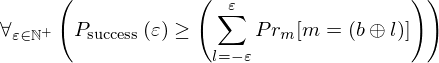

In [10]:
success_sum

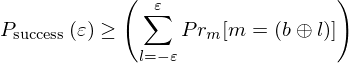

In [11]:
successSum1 = success_sum.specialize()
successSum1.specialize().proven({epsInDomain})

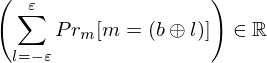

In [12]:
deduceInReals(successSum1.rhs, {epsInDomain}).proven({epsInDomain})

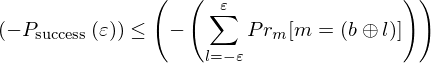

In [13]:
successSum2 = successSum1.deriveNegated({epsInDomain})
successSum2.proven({epsInDomain})

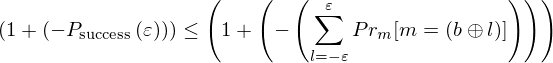

In [14]:
successSum3 = successSum2.deriveShifted(one, addendSide='left', assumptions={epsInDomain})
successSum3.proven({epsInDomain})

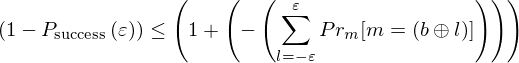

In [15]:
successSum4 = autoSubstitute(successSum3, 'subtractionFolding', [1], {'assumptions':{epsInDomain}})
successSum4.proven({epsInDomain})

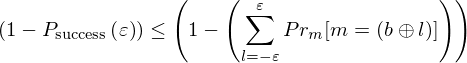

In [16]:
successSum5 = autoSubstitute(successSum4, 'subtractionFolding', [1], {'assumptions':{epsInDomain}})
successSum5.proven({epsInDomain})

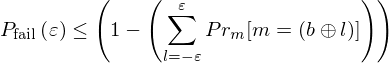

In [17]:
failSum1 = failDefSpec.lhsSubstitute(successSum5)
failSum1.proven({epsInDomain})

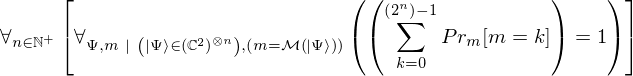

In [18]:
registerQubitAllProbs

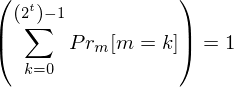

In [22]:
allProbEqualsOne = registerQubitAllProbs.specialize({n:t_}).specialize({Psi:Psi_, m:m_})
allProbEqualsOne.proven({epsInDomain})

In [23]:
lowerBound = Add(Neg(two_pow_t_minus_one), one)
upperBound = two_pow_t_minus_one
display(deduceInIntegers(two_pow_t).proven())
display(deduceInIntegers(lowerBound).proven())
display(deduceInIntegers(upperBound).proven())

In [24]:
boundDiffEq1 = Subtract(upperBound, lowerBound).distribute()
boundDiffEq1.proven()

In [25]:
boundDiffEq2 = boundDiffEq1.applyTransitivity(boundDiffEq1.rhs.group(0, 2))
boundDiffEq2.proven()

In [26]:
boundDiffEq3 = boundDiffEq2.applyTransitivity(boundDiffEq2.rhs.subtractionFolding())
boundDiffEq3.proven()

In [27]:
addTwice

In [28]:
boundDiffEq4 = addTwice.specialize({a:two_pow_t_minus_one}).rhsSubstitute(boundDiffEq3)
boundDiffEq4.proven()

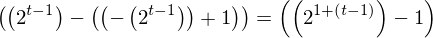

In [29]:
boundDiffEq5 = boundDiffEq4.rhs.operands[0].combineExponents().rhsSubstitute(boundDiffEq4)
boundDiffEq5.proven()

In [30]:
outerCancel

In [31]:
deduceInComplexes(one)
deduceInComplexes(t_)
boundDiffEq6 = outerCancel.specialize({a:one, b:t_}).rhsSubstitute(boundDiffEq5)
boundDiffEq6.proven()

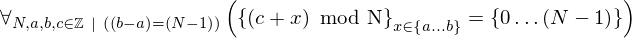

In [32]:
fullModularRangeEquivLeftShift

In [33]:
rangeEquiv1 = fullModularRangeEquivLeftShift.specialize({N:two_pow_t, a:lowerBound, b:upperBound, c:b_, x:l}).proven()
rangeEquiv1

In [34]:
modAddDef

In [35]:
rangeEquiv1.lhs.domain.deduceMemberInIntegers(l)

In [36]:
b_modadd_l_def = modAddDef.specialize({a:b_, b:l})
b_modadd_l_def

In [37]:
setOfAllModAddEquiv = rangeEquiv1.lhs.instanceSubstitution(b_modadd_l_def.deriveReversed().generalize(l, domain=rangeEquiv1.lhs.domain))
setOfAllModAddEquiv

In [38]:
rangeEquiv = setOfAllModAddEquiv.rhsSubstitute(rangeEquiv1)
rangeEquiv.proven()

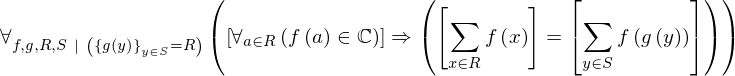

In [39]:
equivSums

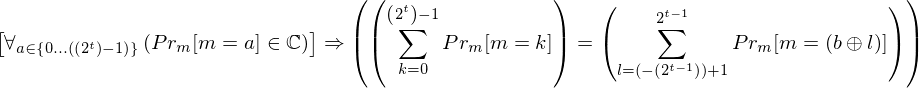

In [40]:
equivSumsSpec = equivSums.specialize({fx:Prob(Equals(m_, x), m_), gy:ModAdd(b_, y), R:rangeEquiv.rhs, S:rangeEquiv.lhs.domain, x:k, y:l})
equivSumsSpec.proven()

In [41]:
deduceInComplexes(equivSumsSpec.hypothesis.instanceExpr.element).generalize(a, equivSumsSpec.hypothesis.domain).proven()

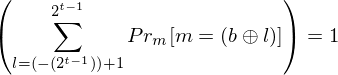

In [42]:
shiftedAllProbEqualsOne = equivSumsSpec.deriveConclusion().rhsSubstitute(allProbEqualsOne).proven()
shiftedAllProbEqualsOne.proven()

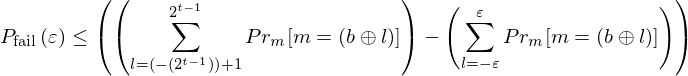

In [43]:
failSum2 = shiftedAllProbEqualsOne.lhsSubstitute(failSum1)
failSum2.proven({epsInDomain})

In [44]:
epsUpperBound = epsInDomain.domain.deduceMemberUpperBound(eps)
epsUpperBound.proven({epsInDomain})

In [45]:
relaxedEpsUpperBound1 = Add(epsUpperBound.rhs, two).deduceStrictIncrease(0).applyTransitivity(epsUpperBound)
relaxedEpsUpperBound1.proven({epsInDomain})

In [46]:
relaxedEpsUpperBound2 = relaxedEpsUpperBound1.lhs.commute().rhsSubstitute(relaxedEpsUpperBound1)
relaxedEpsUpperBound2.proven({epsInDomain})

In [47]:
relaxedEpsUpperBound = outerCancel.specialize({a:two, b:two_pow_t_minus_one}).rhsSubstitute(relaxedEpsUpperBound2).deriveReversed()
relaxedEpsUpperBound.proven({epsInDomain})

In [48]:
deduceNegative(Neg(two_pow_t_minus_one))

In [49]:
lowerBoundLessThanOne = Add(Neg(two_pow_t_minus_one), one).deduceStrictDecrease(1)
lowerBoundLessThanOne

In [50]:
epsLowerBound = epsInDomain.domain.deduceMemberLowerBound(eps)
epsLowerBound.proven({epsInDomain})

In [51]:
relaxedEpsLowerBound = epsLowerBound.applyTransitivity(lowerBoundLessThanOne).deriveRelaxed({epsInDomain})
relaxedEpsLowerBound.proven({epsInDomain})

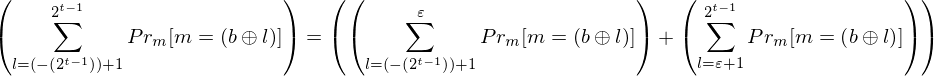

In [52]:
shiftedAllProb = shiftedAllProbEqualsOne.lhs
shiftedAllProbSplit1 = shiftedAllProb.split(eps, side='after', assumptions={epsInDomain})
shiftedAllProbSplit1.proven({epsInDomain})

In [53]:
negEpsLessEqEps = deduceNegative(Neg(eps), {epsInDomain}).applyTransitivity(deducePositive(eps, {epsInDomain})).deriveRelaxed({epsInDomain})
negEpsLessEqEps

In [54]:
upperBoundAddOne = Add(epsUpperBound.rhs, one)
upperBoundAddOne

In [55]:
relaxedNegEpsLowerBound1 = upperBoundAddOne.deduceStrictIncrease(0).applyTransitivity(epsUpperBound).deriveNegated({epsInDomain})
relaxedNegEpsLowerBound1.proven({epsInDomain})

In [56]:
subTwoAddOne

In [57]:
relaxedNegEpsLowerBound2 = subTwoAddOne.specialize({a:two_pow_t_minus_one}).rhsSubstitute(relaxedNegEpsLowerBound1)
relaxedNegEpsLowerBound2.proven({epsInDomain})

In [58]:
relaxedNegEpsLowerBound3 = relaxedNegEpsLowerBound2.lhs.distribute().rhsSubstitute(relaxedNegEpsLowerBound2)
relaxedNegEpsLowerBound3.proven({epsInDomain})

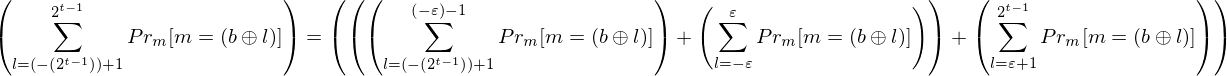

In [59]:
shiftedAllProbSplit2 = shiftedAllProbSplit1.rhs.terms[0].split(Neg(eps), side='before', assumptions={epsInDomain}).rhsSubstitute(shiftedAllProbSplit1)
shiftedAllProbSplit2.proven({epsInDomain})

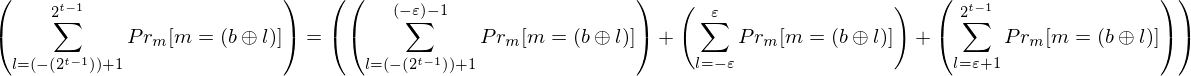

In [60]:
shiftedAllProbSplit3 = shiftedAllProbSplit2.rhs.ungroup(0).rhsSubstitute(shiftedAllProbSplit2)
shiftedAllProbSplit3.proven({epsInDomain})

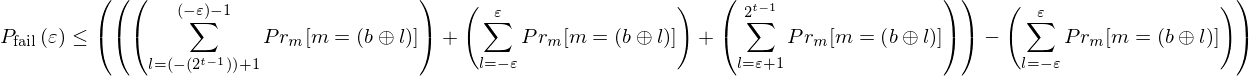

In [61]:
failSum3 = shiftedAllProbSplit3.rhsSubstitute(failSum2)
failSum3.proven({epsInDomain})

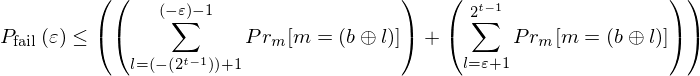

In [62]:
failSum4 = failSum3.rhs.cancel().rhsSubstitute(failSum3)
failSum4.proven({epsInDomain})

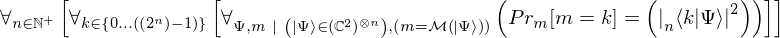

In [63]:
registerQubitBornRule

In [64]:
lInDomain = In(l, fullDomain)
lInDomain

In [65]:
b_modadd_l_def.lhsSubstitute(b_modadd_l_def.rhs.deduceInInterval({lInDomain})).proven({lInDomain})

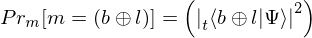

In [67]:
prob_b_modadd_l_eq1 = registerQubitBornRule.specialize({n:t_}).specialize({k:ModAdd(b_, l)}).specialize({Psi:Psi_, m:m_}).proven({lInDomain})
prob_b_modadd_l_eq1

In [68]:
lInDomain.domain.deduceMemberInIntegers(l).proven({lInDomain})

In [69]:
alphaDef

In [70]:
alphaDefSpec = alphaDef.specialize().proven({lInDomain})
alphaDefSpec

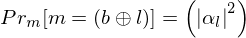

In [71]:
probAsAlphaSqrd = alphaDefSpec.lhsSubstitute(prob_b_modadd_l_eq1)
probAsAlphaSqrd

In [72]:
negDomain = failSum4.rhs.terms[0].domain
posDomain = failSum4.rhs.terms[1].domain
display(negDomain)
display(posDomain)

In [73]:
negDomain.deduceMemberInIntegers(l, {epsInDomain}).proven({In(l, negDomain), epsInDomain})
posDomain.deduceMemberInIntegers(l, {epsInDomain}).proven({In(l, posDomain), epsInDomain})

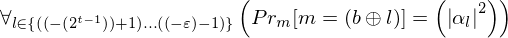

In [74]:
probAsAlphaSqrdOverNegDomain = probAsAlphaSqrd.generalize(l, negDomain)
probAsAlphaSqrdOverNegDomain.proven({epsInDomain})

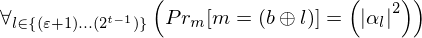

In [75]:
probAsAlphaSqrdOverPosDomain = probAsAlphaSqrd.generalize(l, failSum4.rhs.terms[1].domain)
probAsAlphaSqrdOverPosDomain.proven({epsInDomain})

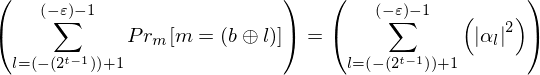

In [76]:
negDomainSumEq = failSum4.rhs.terms[0].instanceSubstitution(probAsAlphaSqrdOverNegDomain)
negDomainSumEq.proven({epsInDomain})

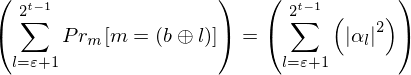

In [77]:
posDomainSumEq = failSum4.rhs.terms[1].instanceSubstitution(probAsAlphaSqrdOverPosDomain)
posDomainSumEq.proven({epsInDomain})

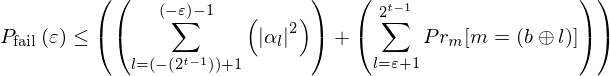

In [78]:
failSum5 = negDomainSumEq.rhsSubstitute(failSum4)
failSum5.proven({epsInDomain})

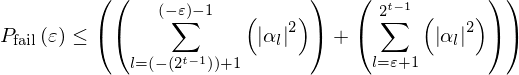

In [79]:
failSum6 = posDomainSumEq.rhsSubstitute(failSum5)
failSum6.proven({epsInDomain})

In [80]:
cleanNegUpperBound1 = Neg(Add(eps, one)).distribute({epsInDomain})
cleanNegUpperBound1.proven({epsInDomain})

In [81]:
cleanNegUpperBound2 = cleanNegUpperBound1.rhs.subtractionFolding(1, {epsInDomain}).rhsSubstitute(cleanNegUpperBound1)
cleanNegUpperBound2.proven({epsInDomain})

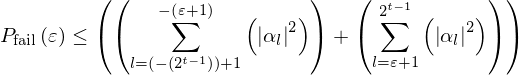

In [82]:
failSum7 = cleanNegUpperBound2.lhsSubstitute(failSum6)
failSum7.proven({epsInDomain})

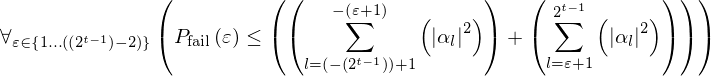

In [84]:
failSum7.generalize(eps, domain=epsInDomain.domain)#.qed()